<a href="https://colab.research.google.com/github/SpartansIIT/CocoMeasure/blob/Feature%2Ffeature-data-science-component/classification_cnn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Spartans/Dataset/training"
VALIDATION_DIR = "/content/drive/MyDrive/Spartans/Dataset/validation"

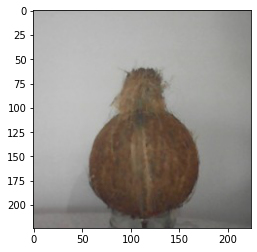

In [ ]:
img = image.load_img("/content/drive/MyDrive/Spartans/Dataset/training/above-13/0.jpg")
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Spartans/Dataset/training/above-13/0.jpg").shape

(224, 224, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1. / 255)
validation = ImageDataGenerator(rescale = 1. / 255)


In [ ]:
training_dataset = train.flow_from_directory ( TRAIN_DIR,
                                           target_size = (224, 224),
                                           batch_size = 16,
                                           class_mode = 'categorical')
validation_dataset = train.flow_from_directory ( VALIDATION_DIR,
                                           target_size = (224, 224),
                                           batch_size = 16,
                                           class_mode = 'categorical')

Found 2098 images belonging to 3 classes.
Found 245 images belonging to 3 classes.


In [ ]:
training_dataset.class_indices


{'above-13': 0, 'below-12': 1, 'between-12-13': 2}

In [ ]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 42kB/s 


In [ ]:
!nvidia-smi

Tue Mar  2 03:28:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (224, 224, 3)),
                    tf.keras.layers.MaxPool2D(2,2),
                    #
                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (224, 224, 3)),
                    tf.keras.layers.MaxPool2D(2,2),
                    #
                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (224, 224, 3)),
                    tf.keras.layers.MaxPool2D(2,2),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(16, activation = 'relu'),
                    #
                    tf.keras.layers.Dense(3, activation = 'softmax')
                     ])



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(training_dataset, 
          epochs=10, 
          validation_data = validation_dataset, 
          steps_per_epoch=len(training_dataset),
          validation_steps=len(validation_dataset))

Epoch 1/10
132/132 [==============================] - 1131s 9s/step - loss: 0.6431 - accuracy: 0.6603 - val_loss: 3.1937 - val_accuracy: 0.4367
Epoch 2/10
132/132 [==============================] - 6s 49ms/step - loss: 0.1090 - accuracy: 0.9647 - val_loss: 1.7823 - val_accuracy: 0.7143
Epoch 3/10
132/132 [==============================] - 6s 49ms/step - loss: 0.0888 - accuracy: 0.9927 - val_loss: 3.5882 - val_accuracy: 0.7592
Epoch 4/10
132/132 [==============================] - 6s 49ms/step - loss: 0.0538 - accuracy: 0.9927 - val_loss: 4.3399 - val_accuracy: 0.7796
Epoch 5/10
132/132 [==============================] - 6s 49ms/step - loss: 0.0362 - accuracy: 0.9991 - val_loss: 4.8363 - val_accuracy: 0.7878
Epoch 6/10
132/132 [==============================] - 6s 47ms/step - loss: 0.0436 - accuracy: 0.9998 - val_loss: 5.1608 - val_accuracy: 0.7878
Epoch 7/10
132/132 [==============================] - 6s 48ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 5.4105 - val_accuracy: 0.787

In [ ]:

model.save('cnn_model.h5')


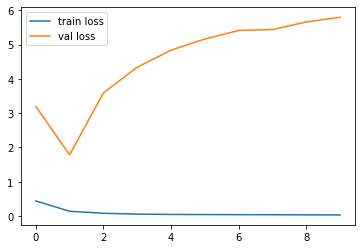

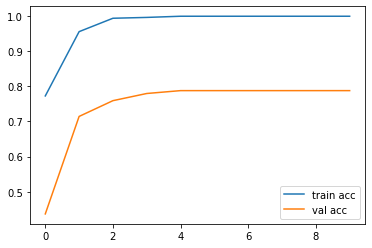

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('cnn_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [ ]:
#images = np.vstack([x])
    #val = model.predict(images)

    #if val == 0:
      #print("coconut size is above 13")
    #elif val == 1:
      #print("coconut size is below 12")
    #elif val == 2:
      #print("coconut size is between 12 and 13")  
  